## Project - Red Wine Quality Using Neural Networks

The red wine industry has experienced a significant surge in growth recently, attributable to the increased prevalence of social drinking. In an effort to promote their products, industry players are utilizing product quality certifications, which can be a time-intensive and costly process, requiring expert human assessment. To streamline the certification and quality assessment processes while making them more cost-effective, it would be beneficial to establish a correlation between human sensory evaluation and the chemical properties of wine. The objective of this project is to identify the most effective indicators of high-quality red wine and provide detailed insights into these factors to improve our model's red wine quality assessment capabilities.

### Data Collection

Link for the dataset from UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/wine+quality for context



In [22]:
# Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

BATCH_SIZE = 100
repeat_count = 1500  
   
CSV_COLUMN_NAMES = []
numerical_feature_names = []
categorical_feature_names = []
# only displays the most important warnings
#tf.logging.set_verbosity(tf.logging.FATAL)

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow.feature_column as fc
import pandas as pd
import numpy as np
import sys

%matplotlib inline

In [3]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Checking missing Values
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_data.isnull().sum()
# There are no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## EDA / Histograms / Data preprocess

<AxesSubplot:>

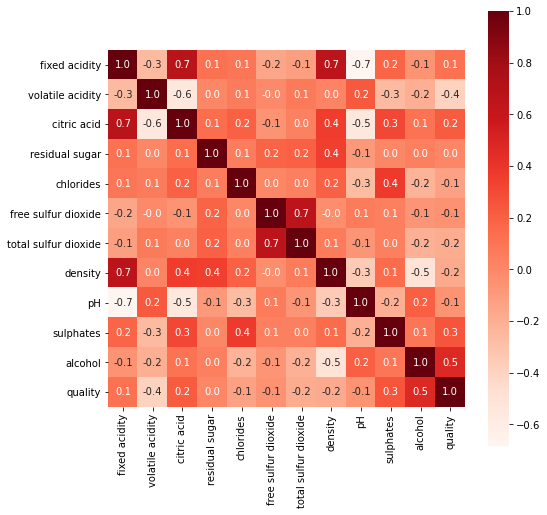

In [6]:
# Using heatmap to check correlation between the variables.
corr = wine_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

In [8]:
# As the ratio of alcohol increases, the quality of red wine gets better. 
# As volatile acidity increases, the quality of red wine declines.

qs = wine_data['quality'].unique()
sorted(qs)

# We can see that the quality column has the values from 3-8. 1 , 2, 3 being the worst quality and 8, the best.

[3, 4, 5, 6, 7, 8]

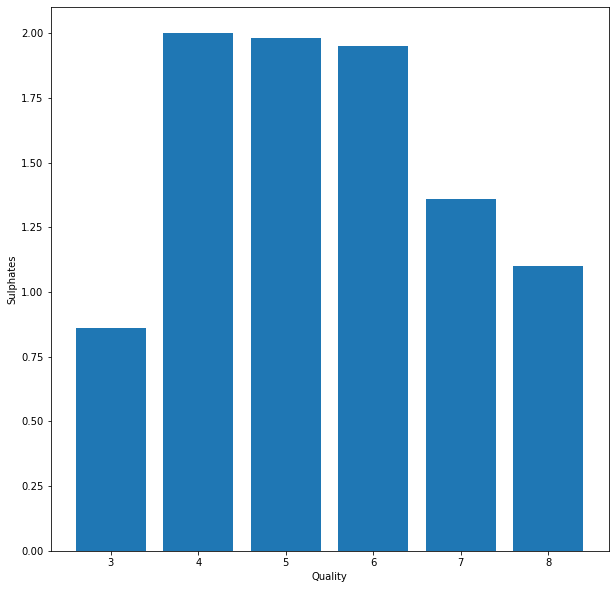

In [10]:
# Sulphates vs Quality
plt.figure(figsize=(10,10))
x = wine_data.quality
y = wine_data.sulphates
plt.bar(x,y)
plt.xlabel("Quality")
plt.ylabel("Sulphates")
plt.show()
# As we can see quality wines have high amounts of sulphates but actually 
# Both poor and great quality wines have similar amounts of sulphates.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

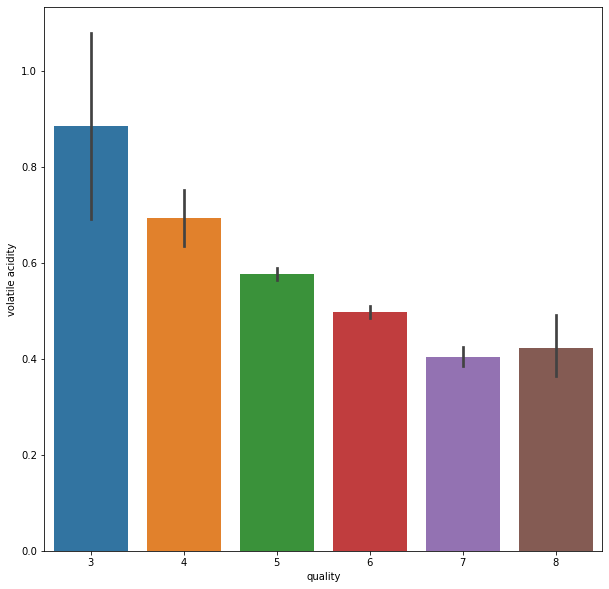

In [11]:
# Volatile Acidity vs Quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)
#Wines with good quality have less volatile acidity.

<AxesSubplot:xlabel='quality', ylabel='pH'>

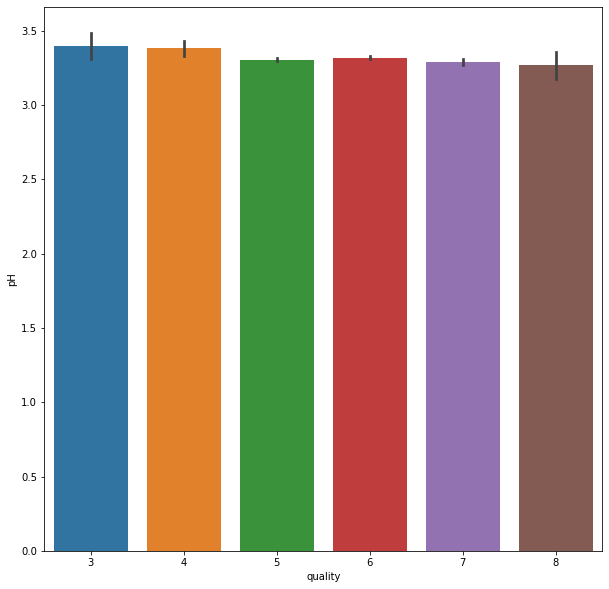

In [12]:
# pH vs Quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='pH',data=wine_data)
# pH of all types of wine are similar, close to 3.5,which is acidic.

<AxesSubplot:xlabel='quality', ylabel='count'>

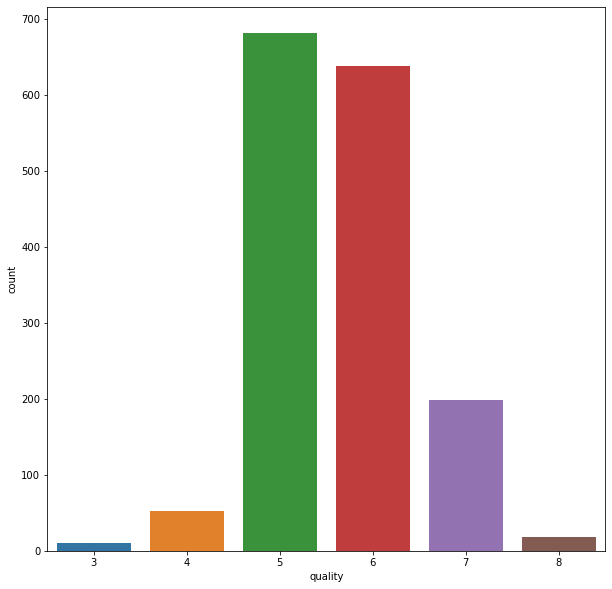

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x="quality", data=wine_data)
#We have many samples of wines of intermediate quality but relatively few samples of wines of poor or excellent quality. 

In [42]:
#Preparation of data
df2 = wine_data.rename({'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, axis='columns')

In [43]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
y=df2.quality
X=df2.drop(['quality'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [85]:
feature_columns = [tf.feature_column.numeric_column(k) for k in X.columns]

In [86]:
def my_model_fn(features, labels, mode):
    if mode == tf.estimator.ModeKeys.PREDICT:
        tf.logging.info("my_model_fn: PREDICT, {}".format(mode))
    elif mode == tf.estimator.ModeKeys.EVAL:
        tf.logging.info("my_model_fn: EVAL, {}".format(mode))
    elif mode == tf.estimator.ModeKeys.TRAIN:
        tf.logging.info("my_model_fn: TRAIN, {}".format(mode))

In [87]:
df2.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [93]:
fixed_acidity = fc.numeric_column('fixed_acidity')
volatile_acidity = fc.numeric_column('volatile_acidity')
citric_acid = fc.numeric_column('citric_acid')
residual_sugar = fc.numeric_column('residual_sugar')
chlorides = fc.numeric_column('chlorides')
free_sulfur_dioxide = fc.numeric_column('free_sulfur_dioxide')
total_sulfur_dioxide = fc.numeric_column('total_sulfur_dioxide')
density = fc.numeric_column('density')
pH = fc.numeric_column('pH')
sulphates = fc.numeric_column('sulphates')
alcohol = fc.numeric_column('alcohol')
feature_col=[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
       chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
       pH, sulphates, alcohol]

In [94]:
def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))
    dataset = dataset.shuffle(1000).repeat().batch(10)
    return dataset
def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((dict(X_test), y_test))
    return dataset.shuffle(1000).repeat().batch(10)

In [95]:
optimizer_adam= tf.optimizers.Adam(learning_rate=0.01)

In [96]:
model=tf.estimator.DNNClassifier([8,4], feature_columns=feature_col, optimizer=optimizer_adam)
classifier = tf.estimator.DNNClassifier(feature_columns=feature_col,
                                          hidden_units=[10, 20, 10],
                                          optimizer=optimizer_adam,
                                          n_classes=50)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\heman\\AppData\\Local\\Temp\\tmpxpi4x9aw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using default config.
INFO:ten

In [97]:
classifier.train(input_fn=lambda: train_input_fn(), steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\heman\AppData\Local\Temp\tmpqw60xa7w\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 8.711302, step = 0
INFO:tensorflow:global_step/sec: 282.283
INFO:tensorflow:loss = 1.37184, step = 100 (0.339 sec)
INFO:tensorflow:global_step/sec: 442.058
INFO:tensorflow:loss = 1.2012926, step = 200 (0.226 sec)
INFO:tensorflow:global_step/sec: 457.956
INFO:tensorflow:loss = 1.2100681, step = 300 (0.218 sec)
INFO:tensorflow:global_step/sec: 445.802
INFO:tensorflow:loss = 1.8920434, step = 400 (0.229 sec)
INFO:tensorflow:global_step/sec: 426.416
INFO:tensorflow:loss = 1.142929, step

In [98]:
eval_results = classifier.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-10-10T12:55:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\heman\AppData\Local\Temp\tmpqw60xa7w\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Inference Time : 0.58255s
INFO:tensorflow:Finished evaluation at 2021-10-10-12:55:35
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.3, average_loss = 1.4610329, global_step = 2000, loss = 1.4610329
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\heman\AppData\Local\Temp\tmpqw60xa7w\model.ckpt-2000


In [99]:
eval_results

{'accuracy': 0.3,
 'average_loss': 1.4610329,
 'loss': 1.4610329,
 'global_step': 2000}

In [109]:
from keras.models import Sequential
from keras.layers import Dense

# Linear Model
model= keras.Sequential([
    layers.Dense(units=1, input_shape=[11])
])

In [110]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_12/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.2939886 ],
       [ 0.3346575 ],
       [-0.27229494],
       [ 0.2001729 ],
       [-0.26387772],
       [ 0.6629713 ],
       [-0.01228851],
       [-0.5015517 ],
       [-0.17513263],
       [-0.23722285],
       [ 0.27442688]], dtype=float32)>

Bias
<tf.Variable 'dense_12/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [114]:
## Adding hidden layers to model
model = keras.Sequential([
    layers.Dense(units=512,activation="relu",input_shape=[8]),
    layers.Dense(units=512,activation="relu"),
    layers.Dense(units=512,activation="relu"),
    layers.Dense(units=1)
])

In [115]:
## Adding activation layers to model

model = keras.Sequential([
    layers.Dense(32,input_shape=[8]),
    layers.Activation("relu"),
    layers.Dense(32),
    layers.Activation("relu"),
    layers.Dense(1),
])

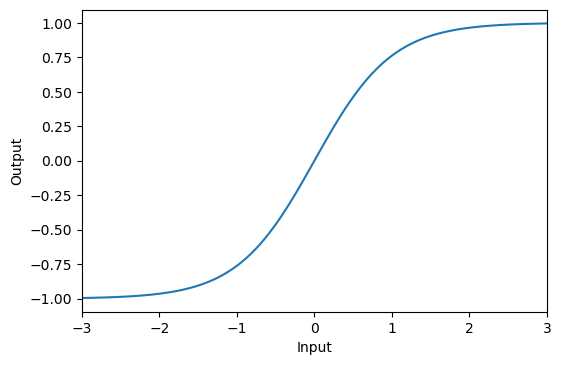

In [116]:
# Tanh activation Function
activation_layer = layers.Activation('tanh')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

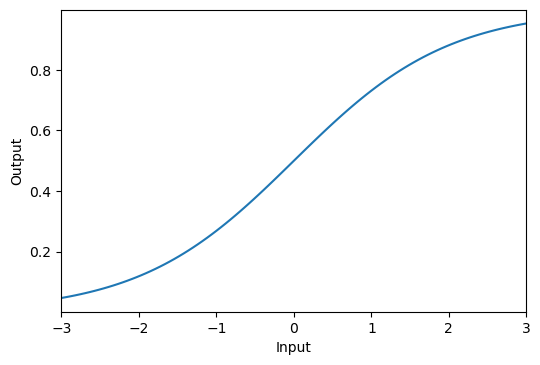

In [117]:
# sigmoid activation Function
activation_layer = layers.Activation('sigmoid')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Training a Model with Early Stopping


In [122]:
## Adding Loss and Optimizer
model.compile(optimizer="Adam",loss="MSE")

In [123]:
# Create training and validation splits
df_train = wine_data.sample(frac=0.7, random_state=0)
df_valid = wine_data.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [124]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mse',
)

Minimum validation loss: 0.015476258471608162


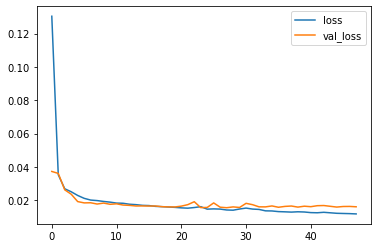

In [125]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## Evaluation of model with train and test plots

Train: 0.014, Test: 136.382


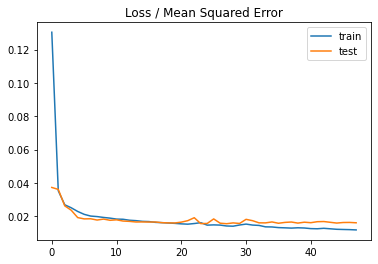

In [128]:
from matplotlib import pyplot
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Conclusion
## The algorithm might perform better with a better distribution among the different scores. 